In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0,100,size=100)
X[:,1] = 0.75 * X[:,0] + 3 + np.random.normal(0.,10.,size=100)

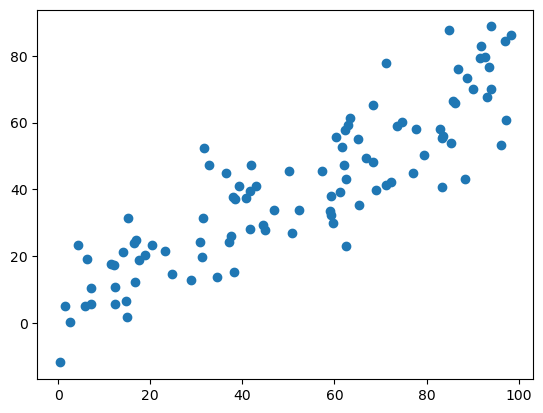

In [23]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### Demean：

In [24]:
def demean(X):
    return X - np.mean(X, axis=0)

In [26]:
print(np.mean(X, axis=0))

[52.03884518 40.67301487]


In [29]:
X_demean = demean(X)

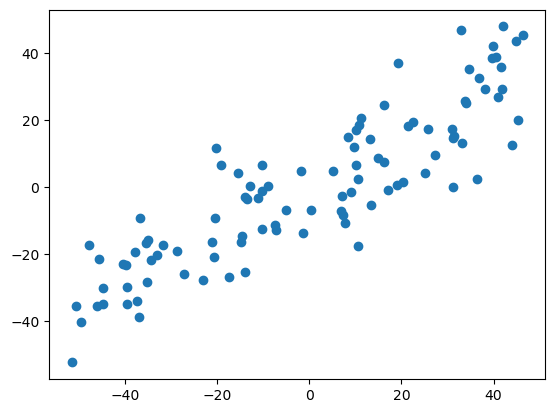

In [52]:
plt.scatter(X_demean[:,0],X_demean[:,1])

### GradientAscent

In [31]:
def f(w, X):
    return np.sum(X.dot(w)**2) / len(X)
# 计算目标函数

In [33]:
def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)
# 计算目标函数梯度

In [40]:
# 向量单位化
def dir(w): return w/np.linalg.norm(w)

# 梯度上升法
def gradient_ascent(X, w_0, eta=0.001, n_iters=1e4, eps=1e-8):
    
    w = dir(w0)
    cur_iter = 0
    
    while cur_iter<n_iters:
        gradient = df(w, X)
        last_w = w
        w = dir(w + eta * gradient)
        if (abs(f(w,X) - f(last_w, X)) < eps) : break;  
        cur_iter+=1;
    
    return w

In [41]:
w0 = np.random.random(X.shape[1]) # 随机化样本特征数量的初始位置
# 此处不能在 0 位置，因为此时的梯度也为 0

In [44]:
gradient_ascent(X_demean, w0) # 求出来主成分所对应的单位向量

array([0.79612149, 0.60513682])

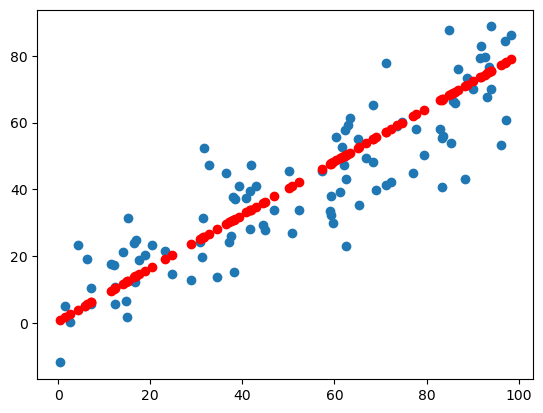

In [51]:
w = gradient_ascent(X_demean, w0)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[:,0], w[0] * X[:,0] + w[1], color='r')